In [3]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import yfinance as yf 
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [4]:
msft = yf.Ticker("MSFT")
msft_hist = msft.history(period="max")
msft = pd.DataFrame(msft_hist)

In [5]:
#nio = yf.Ticker('NIO')
#nio_hist = nio.history(period="max")
#nio = pd.DataFrame(nio_hist)

In [6]:
x = msft.index
y = msft['Close']

## EDA

In [203]:
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

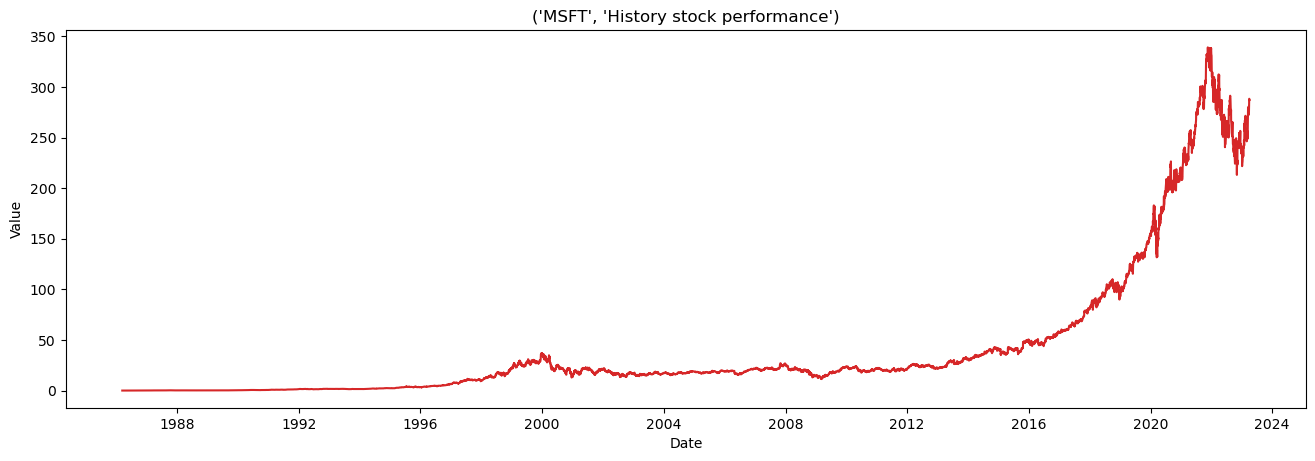

In [204]:
stock_name= "MSFT"
title = (stock_name,"History stock performance")
df_plot(msft , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)

In [41]:
print(msft.isnull().sum())

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [42]:
msft = msft.dropna()

In [43]:
msft.drop_duplicates(keep=False, inplace=True)

In [44]:
q1 = msft['Close'].quantile(0.25)
q3 = msft['Close'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df = msft[msft['Close'] <= upper_bound]

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
msft[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(msft[['Open', 'High', 'Low', 'Close', 'Volume']])

In [99]:
msft = pd.read_csv('msft.csv')

In [100]:
#print(msft.isnull().sum())

In [101]:
msft['Date'] = pd.to_datetime(msft['Date'])

In [49]:
print(msft.duplicated().sum())

0


In [50]:
msft.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)

In [51]:
q1 = msft['Close'].quantile(0.25)
q3 = msft['Close'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df = msft[msft['Close'] <= upper_bound]

In [52]:
scaler = StandardScaler()
msft[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(msft[['Open', 'High', 'Low', 'Close', 'Volume']])

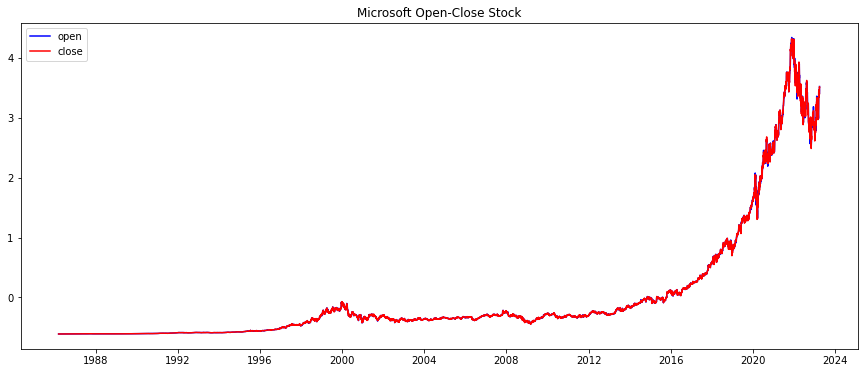

In [157]:
plt.figure(figsize=(15,6))
plt.plot(msft['Date'],
         msft['Open'],
         color="blue",
         label="open")
plt.plot(msft['Date'],
         msft['Close'],
         color="red",
         label="close")
plt.title("Microsoft Open-Close Stock")
plt.legend()

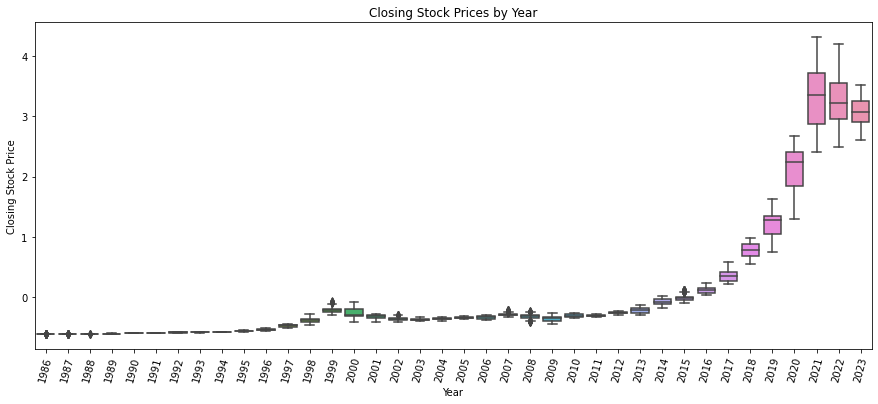

In [158]:
plt.figure(figsize=(15,6))
msft['year'] = msft['Date'].dt.year
sns.boxplot(x='year', y='Close', data=msft)
plt.title('Closing Stock Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Stock Price')
plt.xticks(rotation=75)
plt.show()

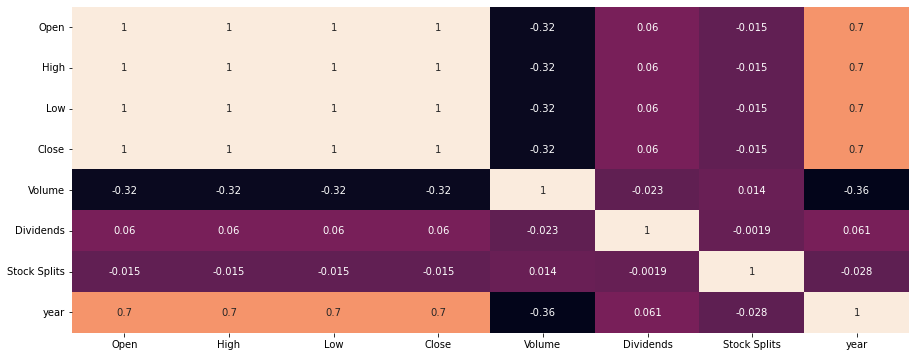

In [159]:
plt.figure(figsize=(15, 6))
sns.heatmap(msft.corr(),
            annot=True,
            cbar=False)
plt.show()

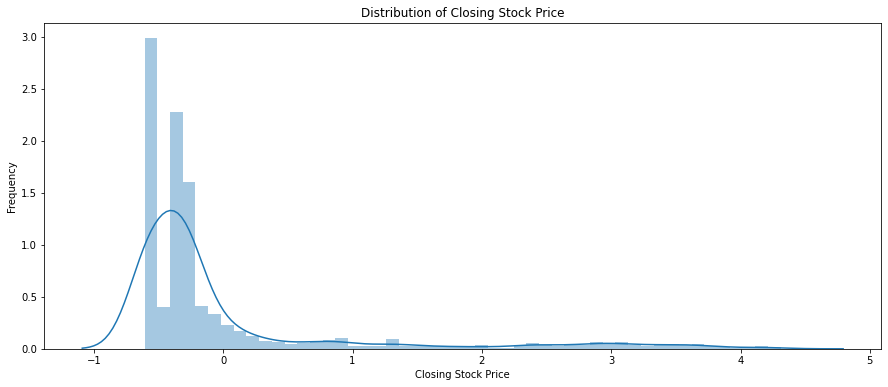

In [160]:
plt.figure(figsize=(15, 6))
sns.distplot(msft['Close'], kde=True)
plt.title('Distribution of Closing Stock Price')
plt.xlabel('Closing Stock Price')
plt.ylabel('Frequency')
plt.show()

In [25]:
msft = yf.Ticker("MSFT")
msft_hist = msft.history(period="max")
msft = pd.DataFrame(msft_hist)

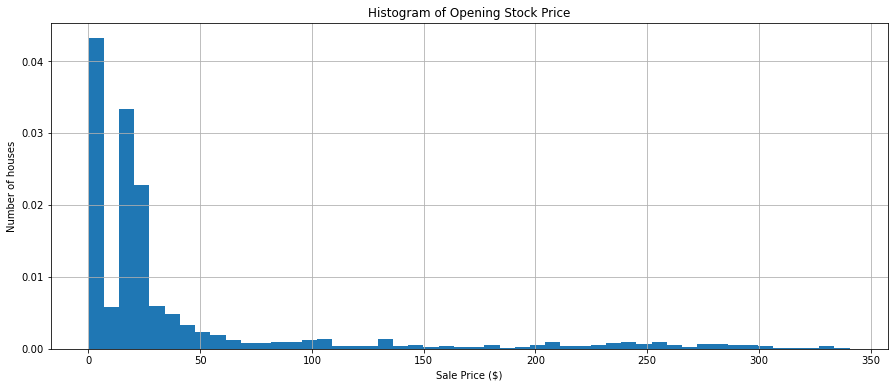

In [205]:
msft['Open'].hist(bins=50, density=True, figsize=(15, 6))
plt.ylabel('Number of houses')
plt.xlabel('Sale Price ($)')
plt.title('Histogram of Opening Stock Price')
plt.show()

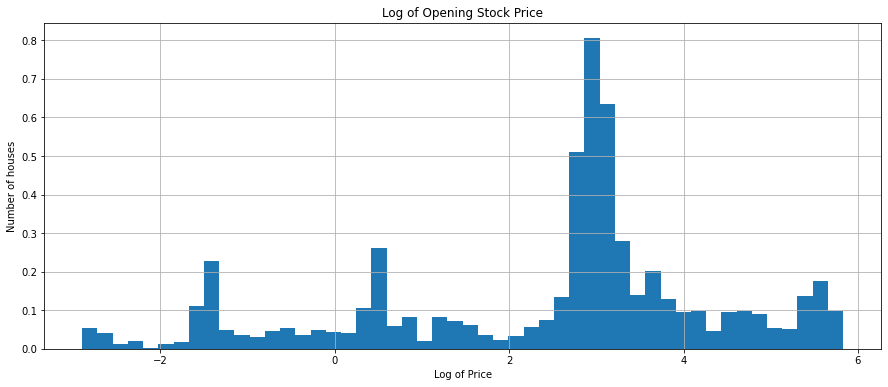

In [206]:
plt.figure(figsize=(15, 6))
np.log(msft['Open']).hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Log of Price')
plt.title('Log of Opening Stock Price')
plt.show()

## Linear Regression

In [169]:
x = msft.index
y = msft['Close']

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [172]:
lr = LinearRegression()
lr.fit(x_train.to_numpy().reshape(-1, 1), y_train)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [[0.00025862]]
regression intercept [-1.21034674]


In [175]:
regression_confidence = regression.score(x_test.to_numpy().reshape(-1,1), y_test)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  0.5026652436120309


In [177]:
predicted=regression.predict(x_test.to_numpy().reshape(-1,1))

In [188]:
predicted = predicted.reshape(-1)

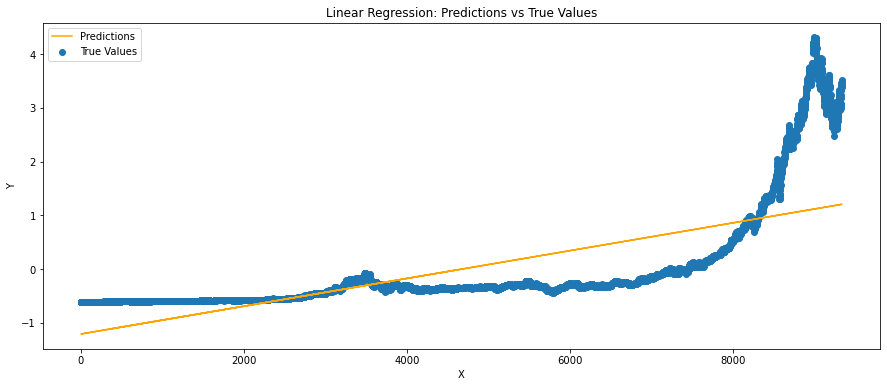

In [193]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x, y, label='True Values')
ax.plot(x_test, predicted, label='Predictions', color='orange')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Linear Regression: Predictions vs True Values')
ax.legend()

plt.show()

## This was just to showcase that Linear Regression is not a good idea for stock prices :D

## LSTM model

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
close_prices = msft['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [72]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [73]:
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [74]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
7412/7412 [==============================] - 4138s 557ms/step - loss: 2.1488e-05
Epoch 2/3
7412/7412 [==============================] - 377s 51ms/step - loss: 7.6874e-06
Epoch 3/3
7412/7412 [==============================] - 380s 51ms/step - loss: 5.7935e-06


In [76]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

59/59 [==============================] - 7s 92ms/step


0.17389550199393292

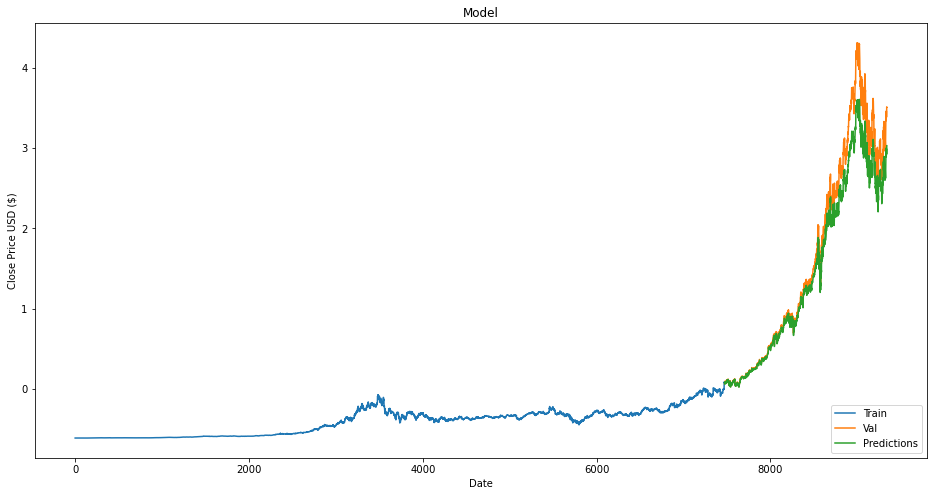

In [77]:
data = msft.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## RNN


In [127]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [128]:
regressor = Sequential()

In [129]:
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (x_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )

In [130]:
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

In [131]:
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

In [132]:
regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

In [133]:
regressor.add(Dense(units = 1))

regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

history = regressor.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
234/234 [==============================] - 7s 7ms/step - loss: 1.1466 - accuracy: 0.0000e+00
Epoch 2/50
234/234 [==============================] - 2s 8ms/step - loss: 1.0674 - accuracy: 0.0000e+00
Epoch 3/50
234/234 [==============================] - 2s 8ms/step - loss: 1.0431 - accuracy: 0.0000e+00
Epoch 4/50
234/234 [==============================] - 2s 7ms/step - loss: 1.0317 - accuracy: 0.0000e+00
Epoch 5/50
234/234 [==============================] - 2s 7ms/step - loss: 1.0251 - accuracy: 0.0000e+00
Epoch 6/50
234/234 [==============================] - 2s 8ms/step - loss: 1.0159 - accuracy: 0.0000e+00
Epoch 7/50
234/234 [==============================] - 2s 7ms/step - loss: 1.0130 - accuracy: 0.0000e+00
Epoch 8/50
234/234 [==============================] - 2s 8ms/step - loss: 1.0086 - accuracy: 0.0000e+00
Epoch 9/50
234/234 [==============================] - 2s 8ms/step - loss: 1.0055 - accuracy: 0.0000e+00
Epoch 10/50
234/234 [==============================] - 2s 8ms/st

In [134]:
history.history["loss"]

[1.1465588808059692,
 1.0673840045928955,
 1.0430928468704224,
 1.0316519737243652,
 1.0251425504684448,
 1.0158709287643433,
 1.0130131244659424,
 1.0085583925247192,
 1.0055075883865356,
 1.0028678178787231,
 1.0054088830947876,
 0.9986310601234436,
 0.999807596206665,
 0.9977863430976868,
 0.9971683025360107,
 0.9984612464904785,
 0.9980788230895996,
 0.9960196614265442,
 0.9968363642692566,
 0.9966720938682556,
 0.9957945346832275,
 0.9973153471946716,
 0.9965617060661316,
 0.9967749118804932,
 0.9969406723976135,
 0.9964321851730347,
 0.9974938631057739,
 0.995774507522583,
 0.9962517023086548,
 0.9956792593002319,
 0.9967561364173889,
 0.997418224811554,
 0.9966558814048767,
 0.9967077374458313,
 0.996975302696228,
 0.9968121647834778,
 0.997307300567627,
 0.9968616366386414,
 0.9968045949935913,
 0.9959530830383301,
 0.9958697557449341,
 0.9960132241249084,
 0.9977005124092102,
 0.99696946144104,
 0.997052013874054,
 0.9959598183631897,
 0.996307373046875,
 0.9964566826820374,
 

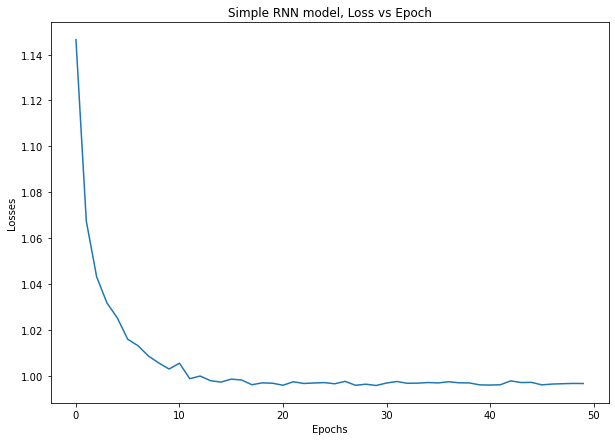

In [135]:
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

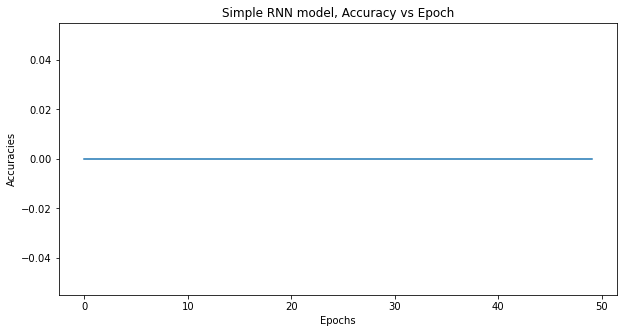

In [136]:
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [137]:
y_pred = regressor.predict(x_train) 
y_pred = scaler.inverse_transform(y_pred)
y_pred.shape

234/234 [==============================] - 2s 4ms/step


(7471, 1)

In [194]:
length_data = len(msft)    
split_ratio = 0.7          
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 9339
Train data length : 6537
Validation data lenth : 2802


## Gradient Boosting Regression

In [276]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [277]:
ticker = yf.Ticker("MSFT")
data = ticker.history(period="max")

In [278]:
data = data.reset_index()
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)
data = data.drop(columns=["Dividends", "Stock Splits"])
data = data.dropna()


X = data.drop(columns=["Close"])
y = data["Close"]


In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [284]:
gbm = GradientBoostingRegressor(n_estimators=50, learning_rate=0.2, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 19042.628233642678


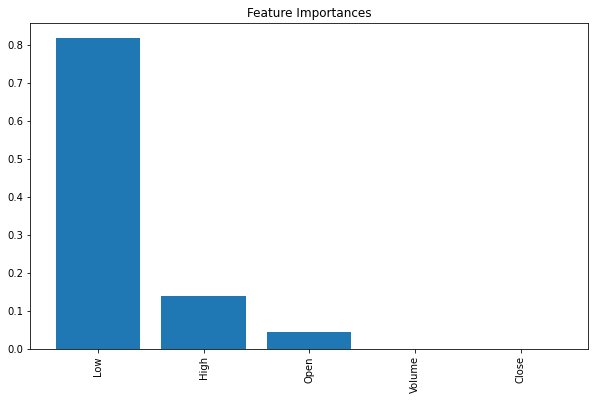

In [270]:
importances = xgb_model.feature_importances_
feature_names = data.columns

indices = importances.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(data.shape[1]), importances[indices])
plt.xticks(range(data.shape[1]), feature_names[indices], rotation=90)
plt.show()

## ARIMA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('msft.csv')#, parse_dates=['Date'], index_col=['Date'])


C:\Users\User\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


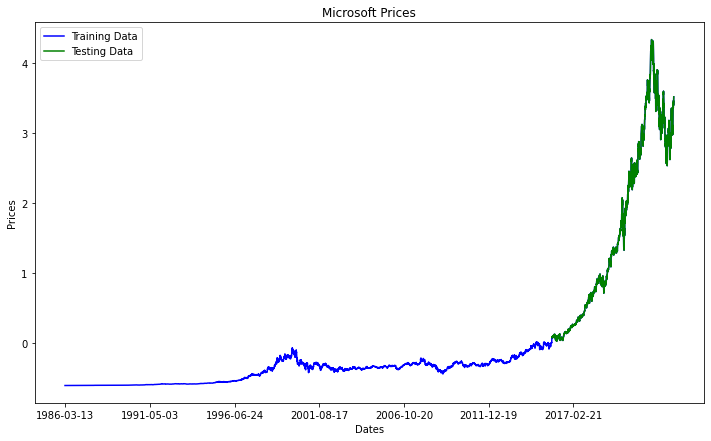

In [3]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Microsoft Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

In [12]:
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [13]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = sm.tsa.arima.ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Lik

Testing Mean Squared Error is 0.0015547712217037425


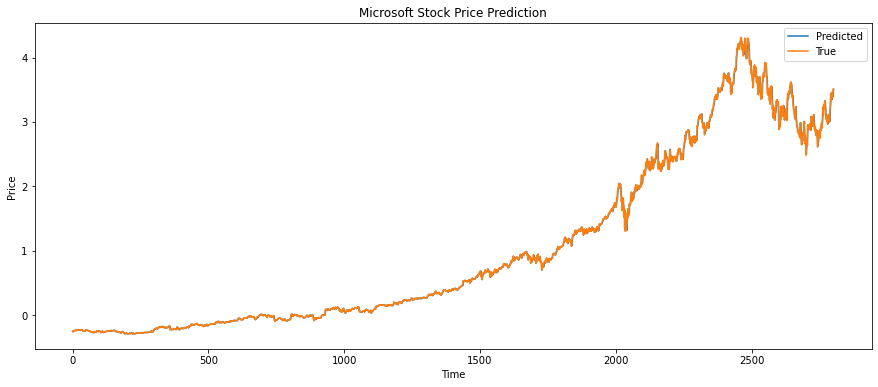

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(model_predictions, label='Predicted')
plt.plot(test_data, label='True')
plt.legend()
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()



## As we can see out of the bunch ARIMA and LSTM showed the best results